# Histograms of Inputs

In [180]:
import sys, os, getopt, h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

Open h5 file with inputs

In [181]:
h5File = h5py.File('/Users/sheilasagear/github/keras-training-ssagear/keras-training/data/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_truth.z')
treeArray = h5File['t_allpar_new'][()]
print(treeArray.dtype.names)


('j_ptfrac', 'j_pt', 'j_eta', 'j_mass', 'j_tau1_b1', 'j_tau2_b1', 'j_tau3_b1', 'j_tau1_b2', 'j_tau2_b2', 'j_tau3_b2', 'j_tau32_b1', 'j_tau32_b2', 'j_zlogz', 'j_c1_b0', 'j_c1_b1', 'j_c1_b2', 'j_c2_b1', 'j_c2_b2', 'j_d2_b1', 'j_d2_b2', 'j_d2_a1_b1', 'j_d2_a1_b2', 'j_m2_b1', 'j_m2_b2', 'j_n2_b1', 'j_n2_b2', 'j_tau1_b1_mmdt', 'j_tau2_b1_mmdt', 'j_tau3_b1_mmdt', 'j_tau1_b2_mmdt', 'j_tau2_b2_mmdt', 'j_tau3_b2_mmdt', 'j_tau32_b1_mmdt', 'j_tau32_b2_mmdt', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 'j_d2_b1_mmdt', 'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 'j_n2_b2_mmdt', 'j_mass_trim', 'j_mass_mmdt', 'j_mass_prun', 'j_mass_sdb2', 'j_mass_sdm1', 'j_multiplicity', 'j_g', 'j_q', 'j_w', 'j_z', 'j_t', 'j_undef')


## 1: Mass histograms

In [182]:
tau = treeArray['j_tau2_b1_mmdt']
c = treeArray['j_c2_b1_mmdt']
d = treeArray['j_d2_b1_mmdt']
m = treeArray['j_m2_b1_mmdt']
n = treeArray['j_n2_b1_mmdt']

Inputs before normalization

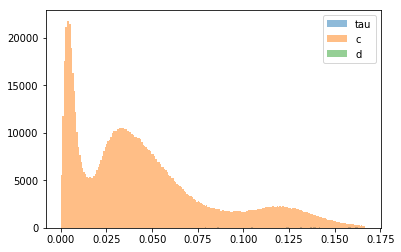

In [183]:
plt.hist(tau, bins, alpha=0.5, label='tau')
plt.hist(c, bins, alpha=0.5, label='c')
plt.hist(d, bins, alpha=0.5, label='d')
plt.legend(loc='upper right')
plt.show()

We need to reshape the input arrays in order to feed them into normalization function

In [184]:
#reshape into 2d arrays
tau = tau.reshape(-1,1)
c = c.reshape(-1,1)
d = d.reshape(-1,1)
m = m.reshape(-1,1)
n = n.reshape(-1,1)

#### MinMax Scaler

In [185]:
scaler = preprocessing.MinMaxScaler().fit(tau)
tau = scaler.transform(tau)

scaler = preprocessing.MinMaxScaler().fit(c)
c = scaler.transform(c)

scaler = preprocessing.MinMaxScaler().fit(d)
d = scaler.transform(d)

scaler = preprocessing.MinMaxScaler().fit(m)
m = scaler.transform(m)

scaler = preprocessing.MinMaxScaler().fit(n)
n = scaler.transform(n)

Normalized inputs

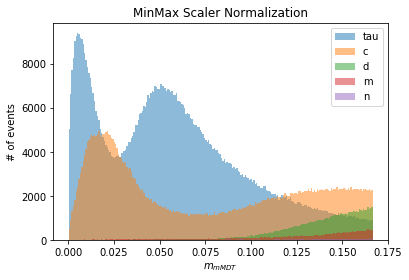

In [186]:
plt.hist(tau, bins, alpha=0.5, label='tau')
plt.hist(c, bins, alpha=0.5, label='c')
plt.hist(d, bins, alpha=0.5, label='d')
plt.hist(m, bins, alpha=0.5, label='m')
plt.hist(n, bins, alpha=0.5, label='n')
plt.title('MinMax Scaler Normalization')
plt.xlabel('$m_{mMDT}$')
plt.ylabel('# of events')
plt.legend(loc='upper right')
#plt.show()

plt.savefig('/Users/sheilasagear/github/keras-training-ssagear/keras-training/exploratory/minmax_mmdt.png')

#### Standard Scaler

In [187]:
tau_s = treeArray['j_tau2_b1_mmdt']
c_s = treeArray['j_c2_b1_mmdt']
d_s = treeArray['j_d2_b1_mmdt']
m_s = treeArray['j_m2_b1_mmdt']
n_s = treeArray['j_n2_b1_mmdt']

In [188]:
#reshape into 2d arrays
tau_s = tau_s.reshape(-1,1)
c_s = c_s.reshape(-1,1)
d_s = d_s.reshape(-1,1)
m_s = m_s.reshape(-1,1)
n_s = n_s.reshape(-1,1)

In [189]:
scaler = preprocessing.StandardScaler().fit(tau_s)
tau_s = scaler.transform(tau_s)

scaler = preprocessing.StandardScaler().fit(c_s)
c_s = scaler.transform(c_s)

scaler = preprocessing.StandardScaler().fit(d_s)
d_s = scaler.transform(d_s)

scaler = preprocessing.StandardScaler().fit(m_s)
m_s = scaler.transform(m_s)

scaler = preprocessing.StandardScaler().fit(n_s)
n_s = scaler.transform(n_s)

Normalized inputs

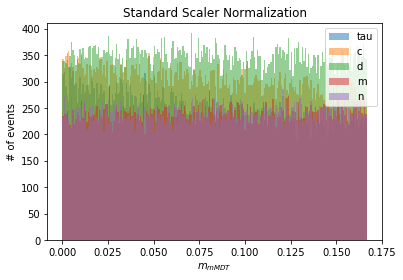

In [190]:
plt.hist(tau_s, bins, alpha=0.5, label='tau')
plt.hist(c_s, bins, alpha=0.5, label='c')
plt.hist(d_s, bins, alpha=0.5, label='d')
plt.hist(m_s, bins, alpha=0.5, label='m')
plt.hist(n_s, bins, alpha=0.5, label='n')
plt.title('Standard Scaler Normalization')
plt.xlabel('$m_{mMDT}$')
plt.ylabel('# of events')
plt.legend(loc='upper right')
#plt.show()

plt.savefig('/Users/sheilasagear/github/keras-training-ssagear/keras-training/exploratory/standard_mmdt.png')

## 2: some other input histograms

In [191]:
tau = treeArray['j_tau2_b1']
c = treeArray['j_c2_b1']
d = treeArray['j_d2_b1']
m = treeArray['j_m2_b1']
n = treeArray['j_n2_b1']

In [192]:
#reshape into 2d arrays
tau = tau.reshape(-1,1)
c = c.reshape(-1,1)
d = d.reshape(-1,1)
m = m.reshape(-1,1)
n = n.reshape(-1,1)

#### MinMax Scaler

In [193]:
scaler = preprocessing.MinMaxScaler().fit(tau)
tau = scaler.transform(tau)

scaler = preprocessing.MinMaxScaler().fit(c)
c = scaler.transform(c)

scaler = preprocessing.MinMaxScaler().fit(d)
d = scaler.transform(d)

scaler = preprocessing.MinMaxScaler().fit(m)
m = scaler.transform(m)

scaler = preprocessing.MinMaxScaler().fit(n)
n = scaler.transform(n)

Normalized inputs

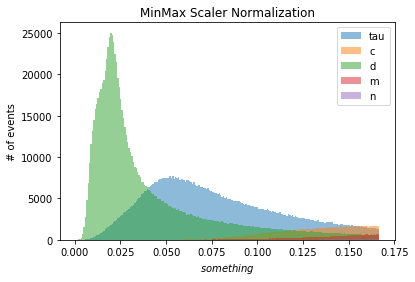

In [194]:
plt.hist(tau, bins, alpha=0.5, label='tau')
plt.hist(c, bins, alpha=0.5, label='c')
plt.hist(d, bins, alpha=0.5, label='d')
plt.hist(m, bins, alpha=0.5, label='m')
plt.hist(n, bins, alpha=0.5, label='n')
plt.title('MinMax Scaler Normalization')
plt.xlabel('$something$')
plt.ylabel('# of events')
plt.legend(loc='upper right')
#plt.show()

plt.savefig('/Users/sheilasagear/github/keras-training-ssagear/keras-training/exploratory/minmax_b.png')

#### Standard Scaler

In [195]:
tau = treeArray['j_tau2_b1']
c = treeArray['j_c2_b1']
d = treeArray['j_d2_b1']
m = treeArray['j_m2_b1']
n = treeArray['j_n2_b1']

In [196]:
#reshape into 2d arrays
tau = tau.reshape(-1,1)
c = c.reshape(-1,1)
d = d.reshape(-1,1)
m = m.reshape(-1,1)
n = n.reshape(-1,1)

In [197]:
scaler = preprocessing.StandardScaler().fit(tau)
tau = scaler.transform(tau)

scaler = preprocessing.StandardScaler().fit(c)
c = scaler.transform(c)

scaler = preprocessing.StandardScaler().fit(d)
d = scaler.transform(d)

scaler = preprocessing.StandardScaler().fit(m)
m = scaler.transform(m)

scaler = preprocessing.StandardScaler().fit(n)
n = scaler.transform(n)

Normalized inputs

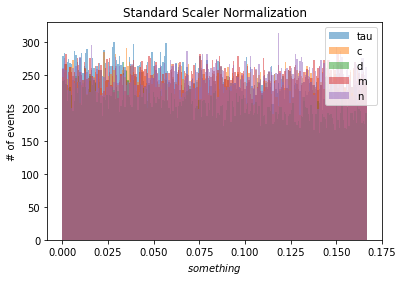

In [198]:
plt.hist(tau, bins, alpha=0.5, label='tau')
plt.hist(c, bins, alpha=0.5, label='c')
plt.hist(d, bins, alpha=0.5, label='d')
plt.hist(m, bins, alpha=0.5, label='m')
plt.hist(n, bins, alpha=0.5, label='n')
plt.title('Standard Scaler Normalization')
plt.xlabel('$something$')
plt.ylabel('# of events')
plt.legend(loc='upper right')
#plt.show()

plt.savefig('/Users/sheilasagear/github/keras-training-ssagear/keras-training/exploratory/standard_b.png')

#### Why does StandardScaler look like this?? ^